<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/CoolChart_Yellowbrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Performance Reports**

18 charts related to different model types.  All are Yellowroad, which offers handy one-line format. The exception is Cooks Distance, which required Matplotlib. Note that many of these are facing deprication, so need to research alternatives.  Handy references tho.

In [26]:
import warnings

In [28]:
warnings.filterwarnings("ignore")

## **Feature Analysis - Rank2D (Pearson)**

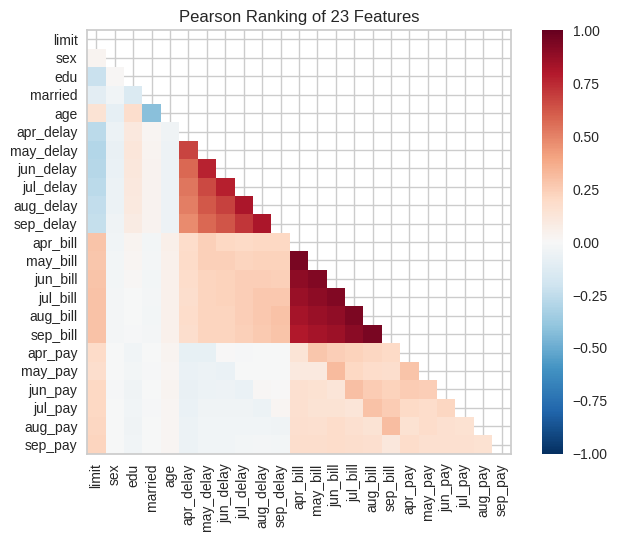

In [29]:
from yellowbrick.features import rank2d
from yellowbrick.datasets import load_credit

X, _ = load_credit()
visualizer = rank2d(X)

## **Feature Analysis - Shapiro Ranking of Features**

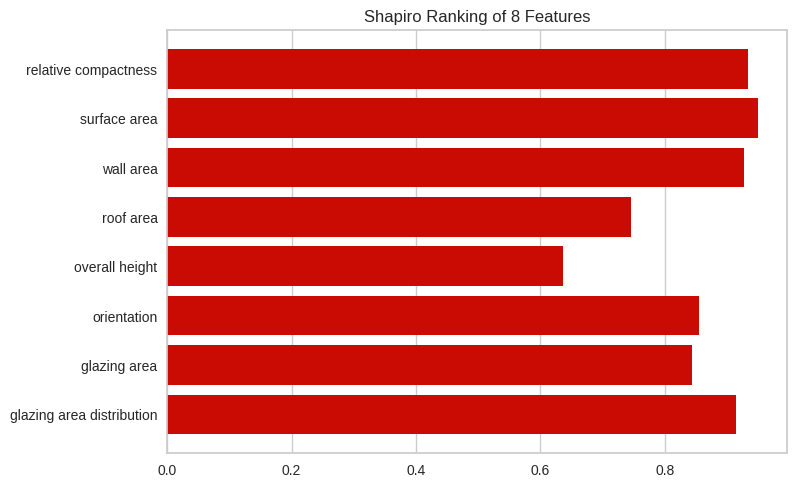

In [30]:
from yellowbrick.features import rank1d
from yellowbrick.datasets import load_energy


X, _ = load_energy()
visualizer = rank1d(X, color="r")

## **Feature Analysis - Parallel Coordinates**

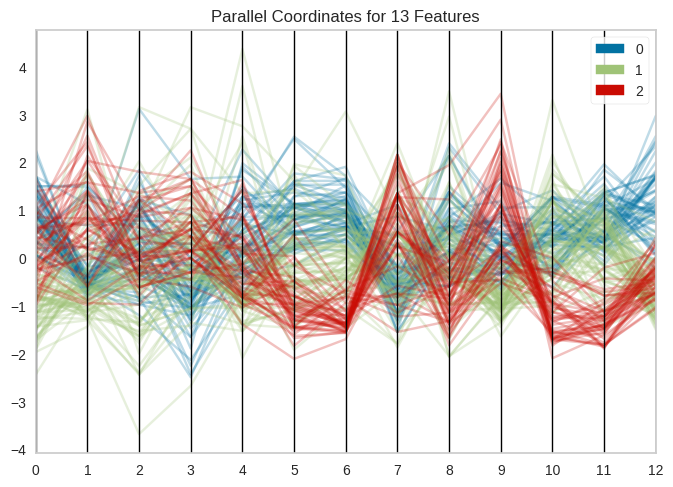

In [31]:
from sklearn.datasets import load_wine
from yellowbrick.features import parallel_coordinates


X, y = load_wine(return_X_y=True)
visualizer = parallel_coordinates(X, y, normalize="standard")

## **Feature Analysis - Radial Visualization**

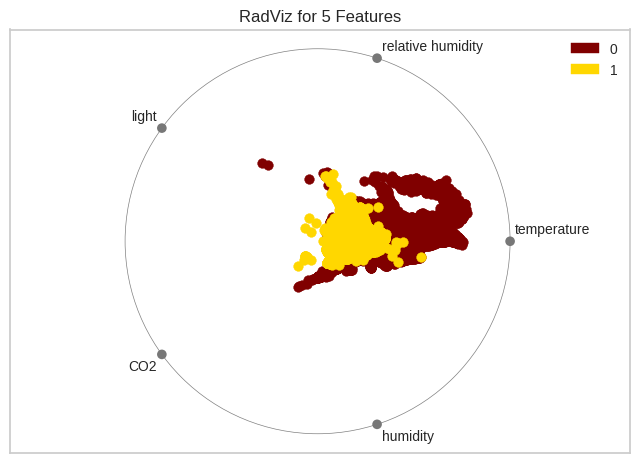

In [32]:
from yellowbrick.features import radviz
from yellowbrick.datasets import load_occupancy


X, y = load_occupancy()
visualizer = radviz(X, y, colors=["maroon", "gold"])

## **Features - Recursive Feature Elimination (RFE)**

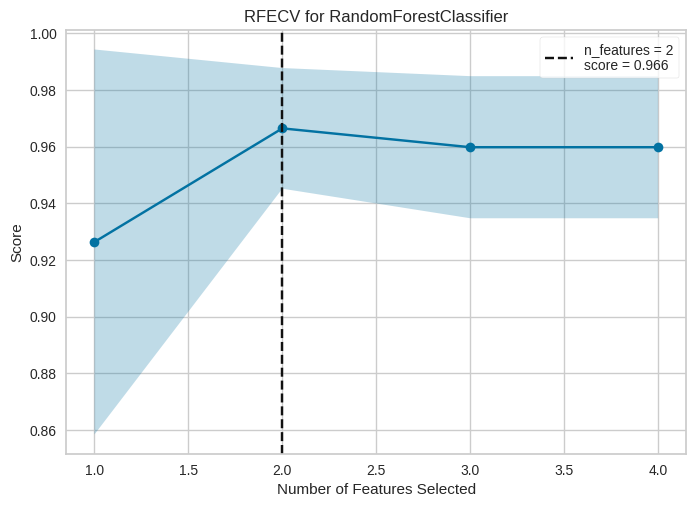

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a cross-validation scheme
cv = StratifiedKFold(5)

# Instantiate RFECV with a RandomForestClassifier
visualizer = RFECV(
    RandomForestClassifier(), cv=cv, scoring='f1_weighted'
)

# Fit the visualizer to the data
visualizer.fit(X, y)

# Display the visualization
visualizer.show()
plt.show()

## **Feature Analysis - PCA**

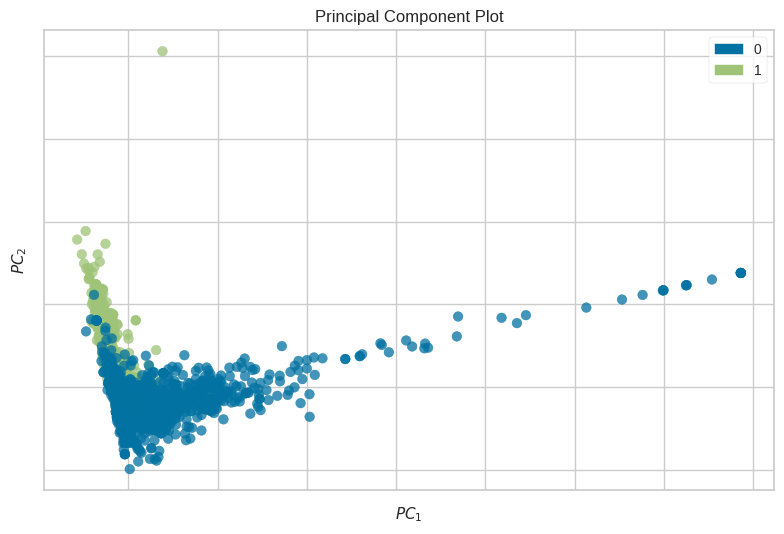

In [33]:
from yellowbrick.datasets import load_spam
from yellowbrick.features import pca_decomposition


X, y = load_spam()
visualizer = pca_decomposition(X, y)

## **Feature Analysis - PCA 3D (Not one-liner)**

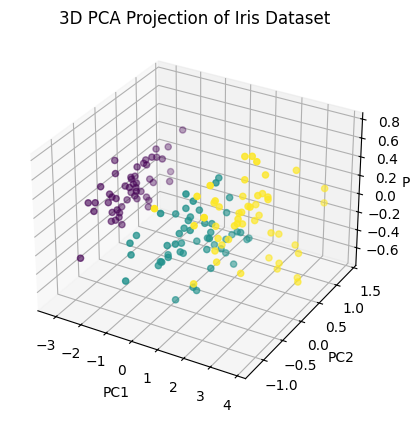

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=3)  # Reduce to 3 dimensions
X_reduced = pca.fit_transform(X)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded classes
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y)

# Set labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Projection of Iris Dataset')

plt.show()

## **Manifold**

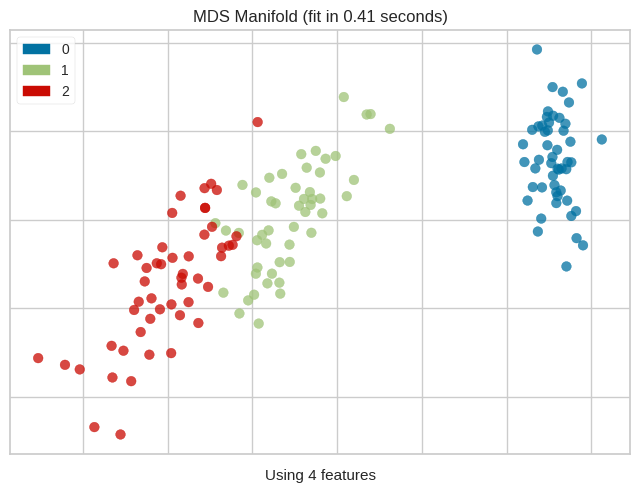

In [34]:
from sklearn.datasets import load_iris
from yellowbrick.features import manifold_embedding


X, y = load_iris(return_X_y=True)
visualizer = manifold_embedding(X, y)

## **Classification - Class Prediction Error**

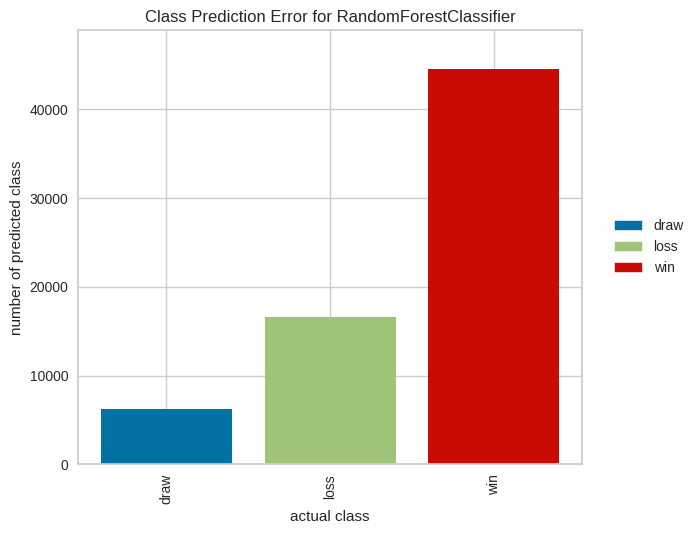

In [35]:
from yellowbrick.datasets import load_game
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import class_prediction_error


X, y = load_game()
X = OneHotEncoder().fit_transform(X)
visualizer = class_prediction_error(
    RandomForestClassifier(n_estimators=10), X, y
)

## **Classification - Classification Report**

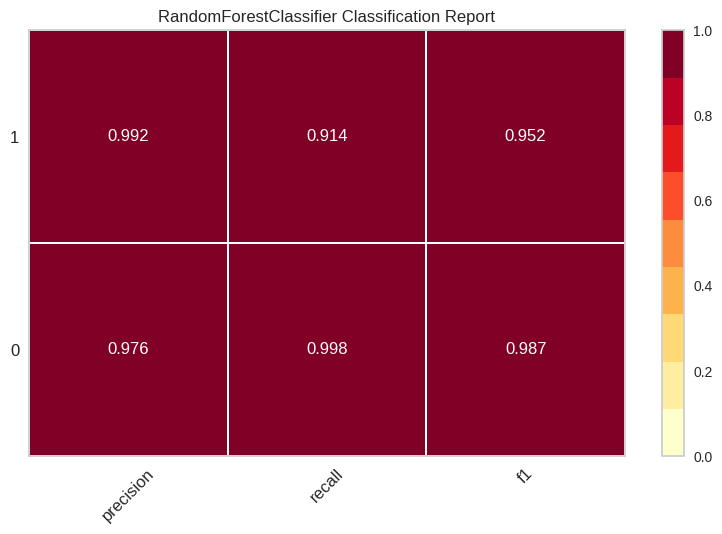

In [36]:
from yellowbrick.datasets import load_credit
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import classification_report


X, y = load_credit()
visualizer = classification_report(
    RandomForestClassifier(n_estimators=10), X, y
)

## **Classification - Confusion Matrix**

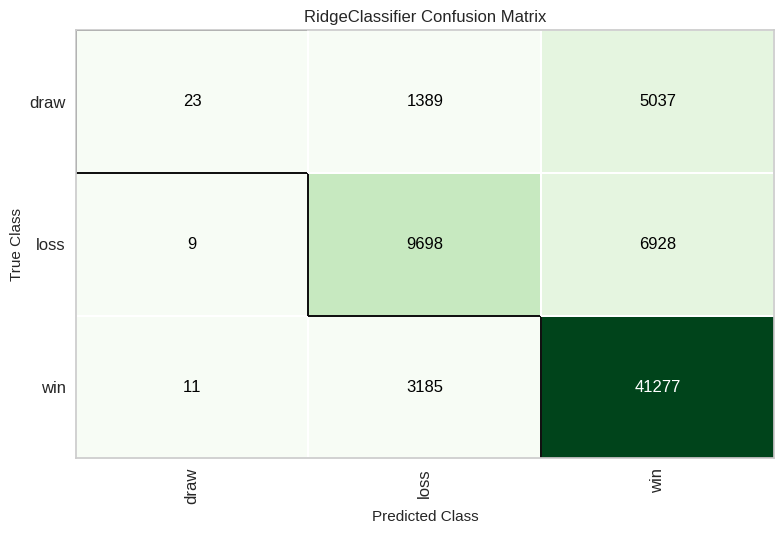

In [19]:
from yellowbrick.datasets import load_game
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import confusion_matrix


X, y = load_game()
X = OneHotEncoder().fit_transform(X)
visualizer = confusion_matrix(RidgeClassifier(), X, y, cmap="Greens")

## **Classification - Precision Recall**

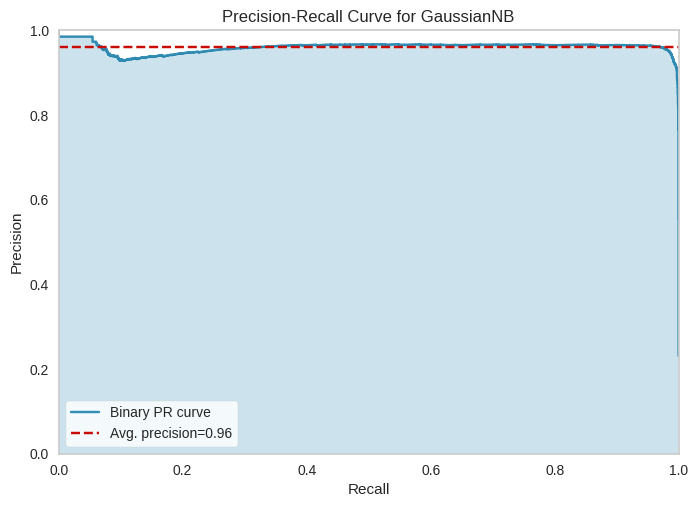

In [20]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import precision_recall_curve


X, y = load_occupancy()
visualizer = precision_recall_curve(GaussianNB(), X, y)

### **Classification - ROC-AUC**

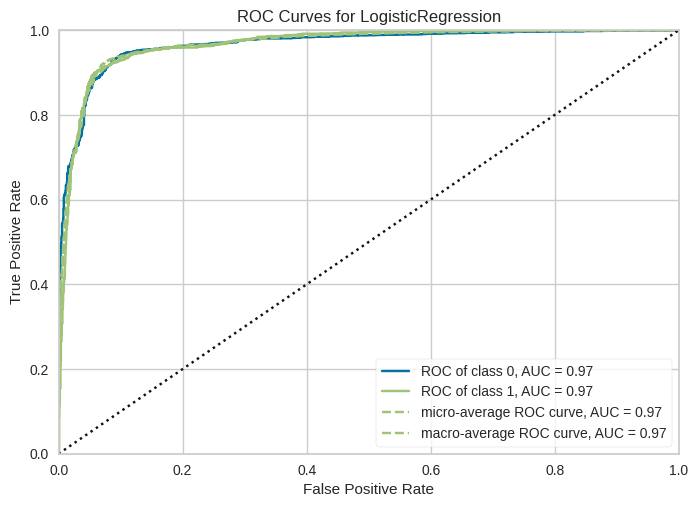

In [37]:
from yellowbrick.classifier import roc_auc
from yellowbrick.datasets import load_spam
from sklearn.linear_model import LogisticRegression


X, y = load_spam()
visualizer = roc_auc(LogisticRegression(), X, y)

## **Classification - Discrimination Threshold**

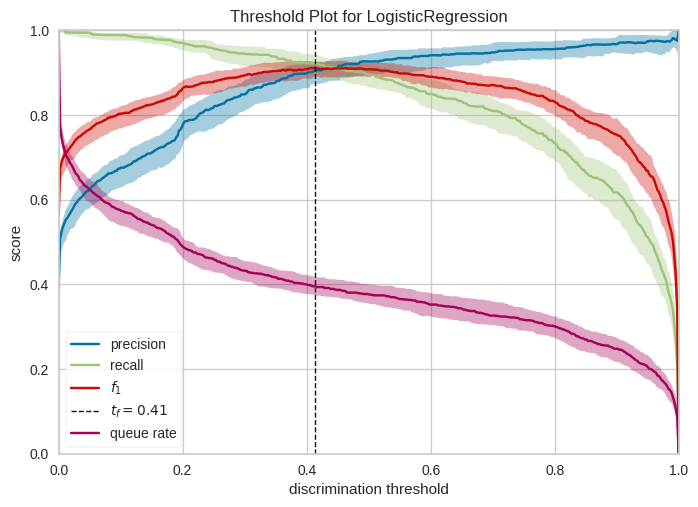

In [38]:
from yellowbrick.classifier import discrimination_threshold
from sklearn.linear_model import LogisticRegression
from yellowbrick.datasets import load_spam

X, y = load_spam()
visualizer = discrimination_threshold(
    LogisticRegression(multi_class="auto", solver="liblinear"), X, y
)

## **Regression - Residuals Plot**

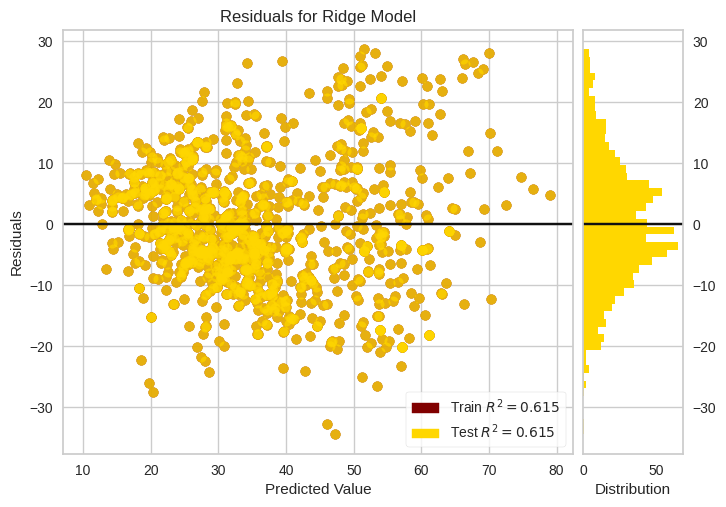

In [4]:
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import residuals_plot


X, y = load_concrete()
visualizer = residuals_plot(
    Ridge(), X, y, train_color="maroon", test_color="gold"
)

## **Residuals - Prediction Error**

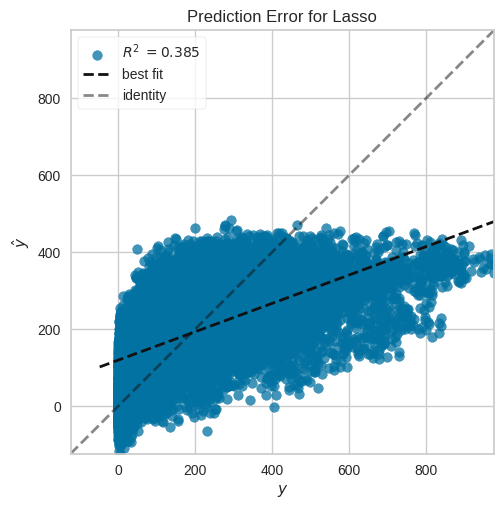

In [5]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_bikeshare
from yellowbrick.regressor import prediction_error


X, y = load_bikeshare()
visualizer = prediction_error(Lasso(), X, y)

## **Residuals - Cooks Distance (NOT YELLOWBRICK)**

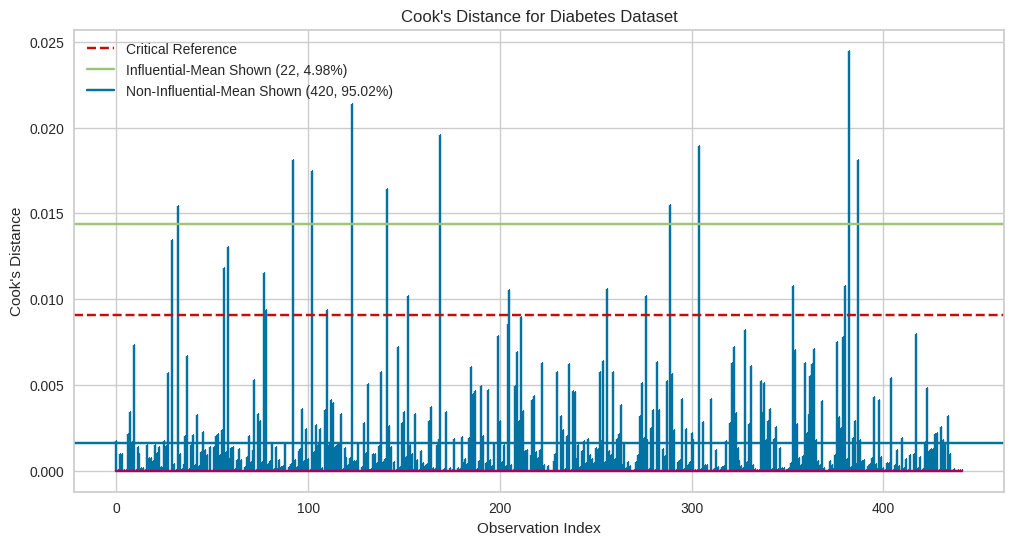

In [41]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load data and fit model (same as before)
X, y = load_diabetes(return_X_y=True)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Calculate critical reference line
n = len(X)  # Number of observations
critical_line = 4 / n  # Or 4 / (n - k - 1) if you know k

# Identify influential and non-influential points
influential_indices = cooks_d > critical_line
num_influential = sum(influential_indices)
num_non_influential = n - num_influential

# Calculate percentages
percent_influential = (num_influential / n) * 100
percent_non_influential = (num_non_influential / n) * 100

# Create stem plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.stem(range(len(cooks_d)), cooks_d, markerfmt=",")

# Add critical reference line
ax.axhline(y=critical_line, color='r', linestyle='--', label='Critical Reference')

# Add lines for influential and non-influential points
ax.axhline(y=cooks_d[influential_indices].mean(), color='g', linestyle='-',
           label=f'Influential-Mean Shown ({num_influential}, {percent_influential:.2f}%)')
ax.axhline(y=cooks_d[~influential_indices].mean(), color='b', linestyle='-',
           label=f'Non-Influential-Mean Shown ({num_non_influential}, {percent_non_influential:.2f}%)')

# Set labels and title
ax.set_xlabel("Observation Index")
ax.set_ylabel("Cook's Distance")
ax.set_title("Cook's Distance for Diabetes Dataset")
ax.legend()  # Show legend

plt.show()

## **Clustering - Silhouette Scores**

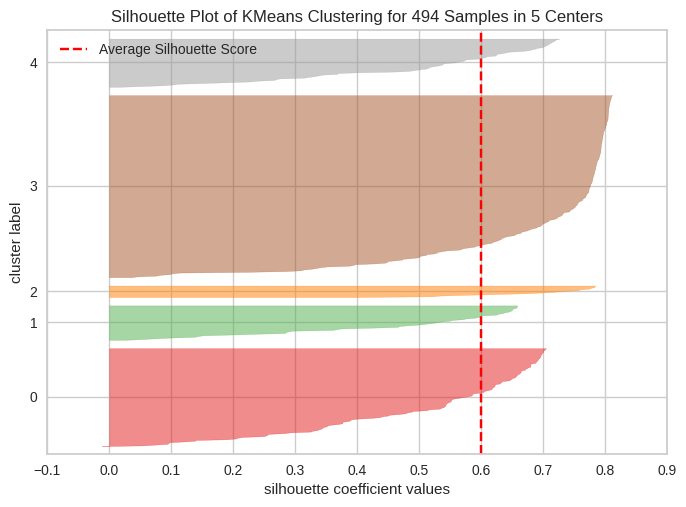

In [7]:
from sklearn.cluster import KMeans
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import silhouette_visualizer

X, y = load_nfl()
visualizer = silhouette_visualizer(KMeans(5, random_state=42), X)

## **Clustering - Intercluster Distance**

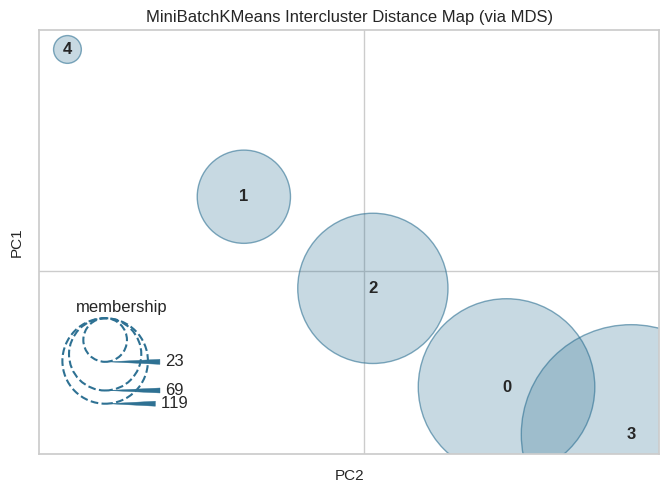

In [9]:
from yellowbrick.datasets import load_nfl
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import intercluster_distance


X, y = load_nfl()
visualizer = intercluster_distance(MiniBatchKMeans(5, random_state=777), X)

## **Target Analysis - ClassBalance**

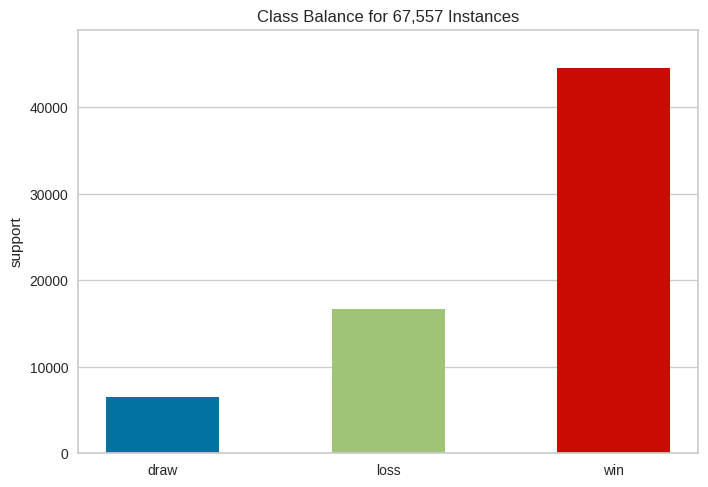

In [10]:
from yellowbrick.datasets import load_game
from yellowbrick.target import class_balance


X, y = load_game()
visualizer = class_balance(y, labels=["draw", "loss", "win"])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea


Performance Summary:
Optimal Tree Depth: 4
Maximum Cross-Validation Score: 0.016
Training Score at Optimal Depth: 0.090
Overfitting Begins at Depth: 4


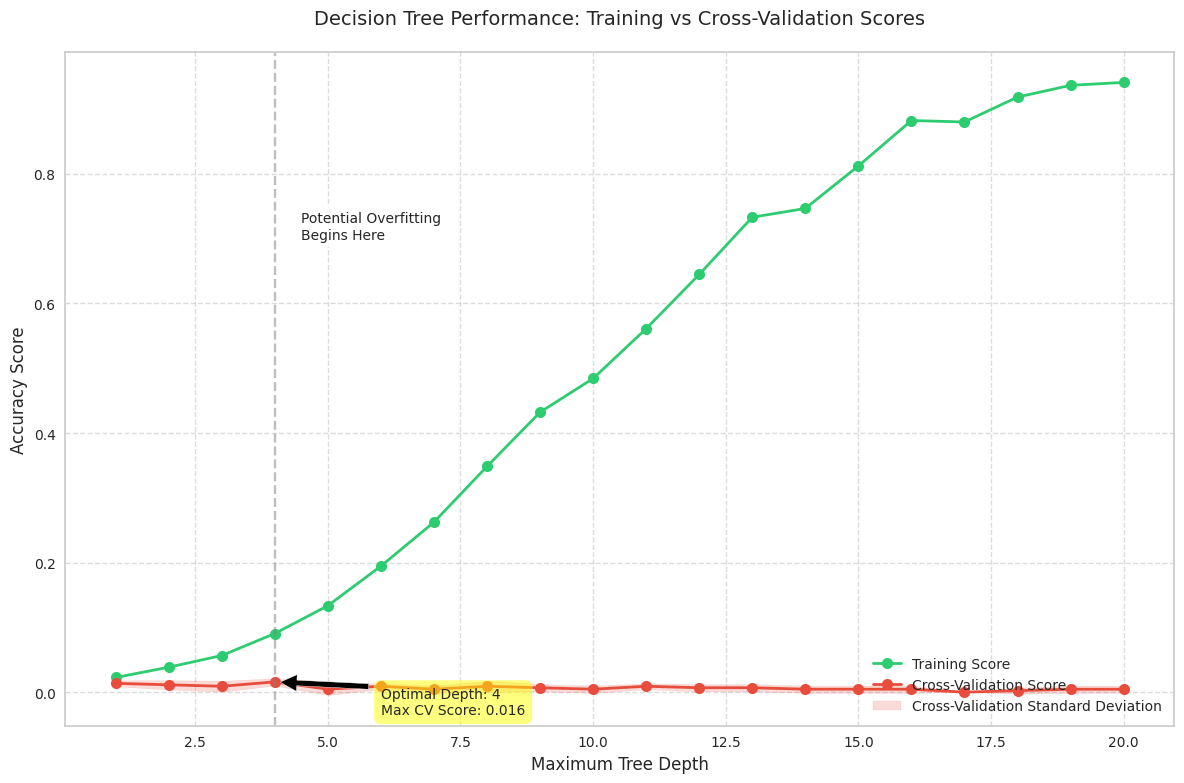

In [7]:
import numpy as np
import pandas as pd
#from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Load a dataset with sufficient complexity for interesting results
# We'll use the breast cancer dataset as it has enough features for complex relationships
data = load_diabetes()
X = data.data
y = data.target

# Initialize lists to store our scores
max_depths = range(1, 21)  # We'll test depths from 1 to 20
training_scores = []
cv_scores = []
cv_std = []  # To store standard deviation of cross-validation scores

# For each depth, calculate both training and cross-validation scores
for depth in max_depths:
    # Create and train the model
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Get training score
    dt.fit(X, y)
    train_score = dt.score(X, y)
    training_scores.append(train_score)

    # Get cross-validation scores
    cv_score = cross_val_score(dt, X, y, cv=5)
    cv_scores.append(cv_score.mean())
    cv_std.append(cv_score.std())

# Create a DataFrame for easy plotting
scores_df = pd.DataFrame({
    'Max Depth': max_depths,
    'Training Score': training_scores,
    'Cross-Validation Score': cv_scores,
    'CV Upper Bound': np.array(cv_scores) + np.array(cv_std),
    'CV Lower Bound': np.array(cv_scores) - np.array(cv_std)
})

# Set up the plotting style
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# Plot training scores
plt.plot(scores_df['Max Depth'], scores_df['Training Score'],
         label='Training Score', marker='o', linewidth=2,
         color='#2ecc71', markersize=8)

# Plot cross-validation scores with confidence interval
plt.plot(scores_df['Max Depth'], scores_df['Cross-Validation Score'],
         label='Cross-Validation Score', marker='o', linewidth=2,
         color='#e74c3c', markersize=8)

# Add confidence interval for cross-validation
plt.fill_between(scores_df['Max Depth'],
                 scores_df['CV Lower Bound'],
                 scores_df['CV Upper Bound'],
                 alpha=0.2, color='#e74c3c',
                 label='Cross-Validation Standard Deviation')

# Customize the plot
plt.xlabel('Maximum Tree Depth', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Decision Tree Performance: Training vs Cross-Validation Scores',
          fontsize=14, pad=20)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize legend
plt.legend(fontsize=10, loc='lower right')

# Add annotations for important points
optimal_depth = max_depths[np.argmax(cv_scores)]
max_cv_score = max(cv_scores)

plt.annotate(f'Optimal Depth: {optimal_depth}\nMax CV Score: {max_cv_score:.3f}',
            xy=(optimal_depth, max_cv_score),
            xytext=(optimal_depth+2, max_cv_score-0.05),
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            fontsize=10)

# Identify overfitting point
overfitting_idx = np.where(np.array(training_scores) - np.array(cv_scores) > 0.1)[0][0]
plt.axvline(x=overfitting_idx, color='gray', linestyle='--', alpha=0.5)
plt.text(overfitting_idx+0.5, 0.7,
         'Potential Overfitting\nBegins Here',
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Print summary statistics
print("\nPerformance Summary:")
print(f"Optimal Tree Depth: {optimal_depth}")
print(f"Maximum Cross-Validation Score: {max_cv_score:.3f}")
print(f"Training Score at Optimal Depth: {training_scores[optimal_depth-1]:.3f}")
print(f"Overfitting Begins at Depth: {overfitting_idx}")

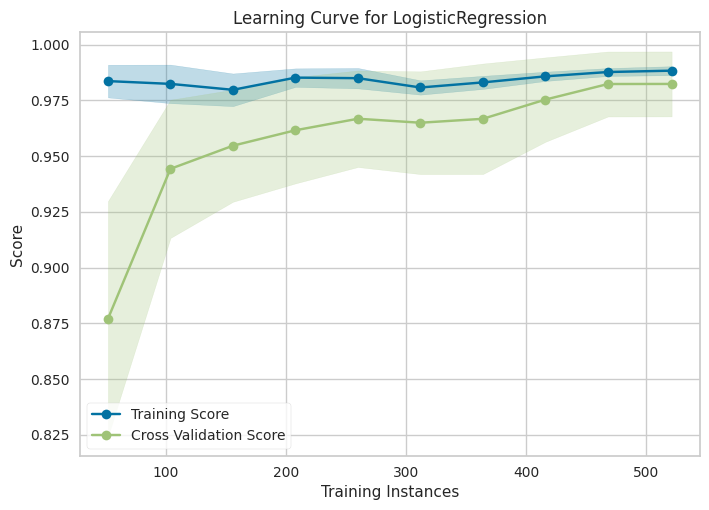

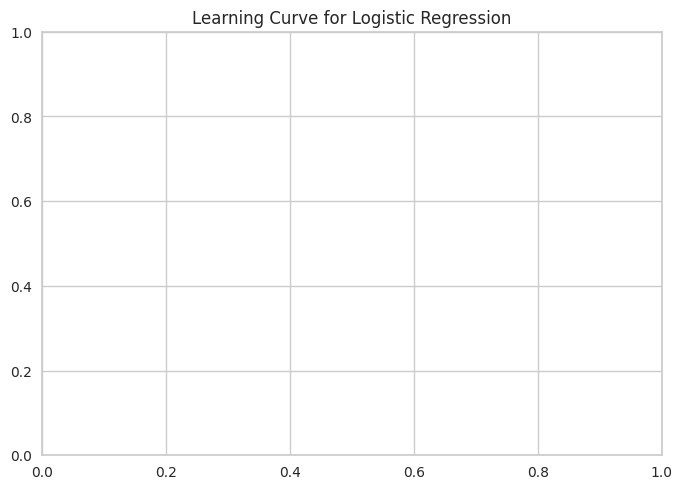

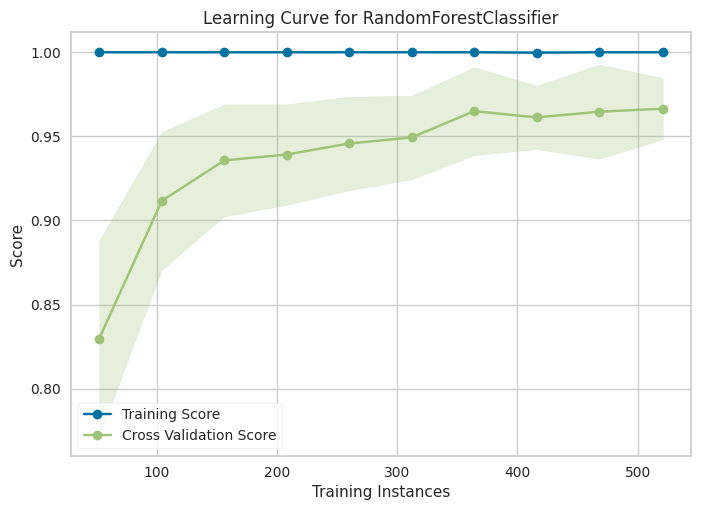

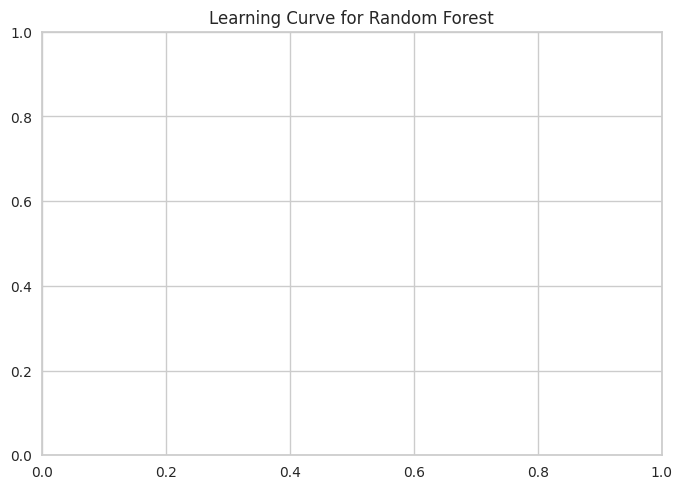

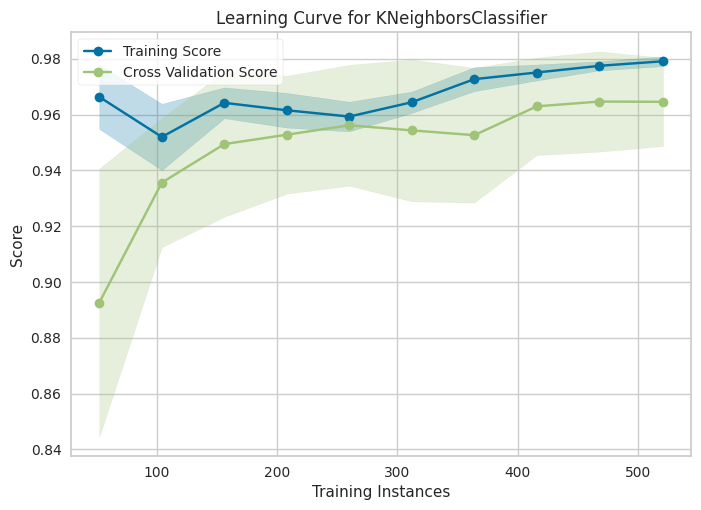

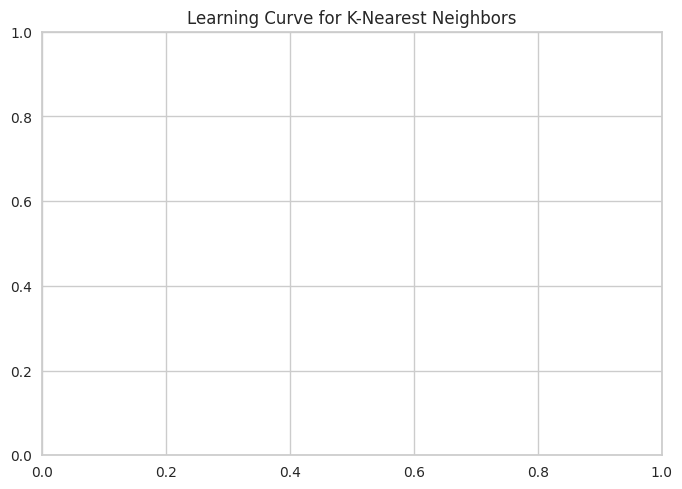

In [8]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Create a cross-validation scheme
cv = StratifiedKFold(n_splits=12)

# Define the models and their names
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Plot learning curves for each model
for model_name, model in models:
    visualizer = LearningCurve(
        model, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    visualizer.fit(X, y)        # Fit the data to the visualizer
    visualizer.show()           # Finalize and render the figure
    plt.title(f"Learning Curve for {model_name}")
    plt.show()